# DATA ANALYSIS OF SUPERMARKET SALES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales_data = pd.read_csv('C:/Users/Acer/Desktop/kaggle/DataAnalysis/supermarketsales.csv')

In [4]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales_data.shape

(1000, 17)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Data Cleaning

In [7]:
sales_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### Question 1: What was the best branch for sales? How much was earned that branch?

In [9]:
sales_by_branch = sales_data.groupby('Branch').sum()
sales_by_branch.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


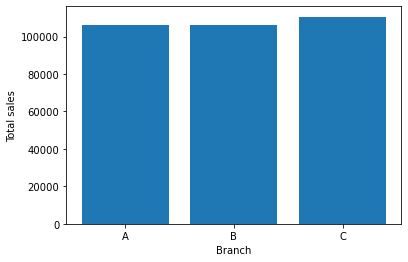

In [11]:
branchs = [i for i, df in sales_data.groupby('Branch')]

plt.bar(branchs, sales_by_branch['Total'])
plt.ylabel('Total sales')
plt.xlabel('Branch')
plt.show()

#### Question 2: What was the best month for sales? How much was earned that month?

In [13]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [15]:
sales_data['Month'] = sales_data['Date'].dt.month

In [16]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [18]:
sales_per_month = sales_data.groupby('Month').sum()
sales_per_month.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


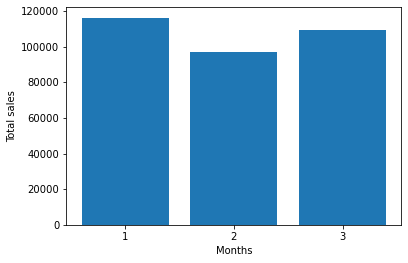

In [23]:
plt.bar(months, sales_per_month['Total'])
plt.xticks(months)
plt.ylabel('Total sales')
plt.xlabel('Months')
plt.show()

#### Question 3: What city had the highest number of sales?

In [24]:
sales_per_city = sales_data.groupby('City').sum()
sales_per_city.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
City,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,665
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,640
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,688


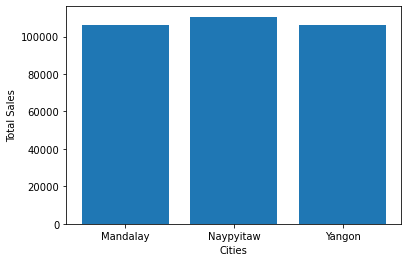

In [26]:
cities = [i for i, df in sales_data.groupby('City')]

plt.bar(cities, sales_per_city['Total'])
plt.ylabel('Total Sales')
plt.xlabel('Cities')
plt.show()

#### Question 4: What product line are most often sold?

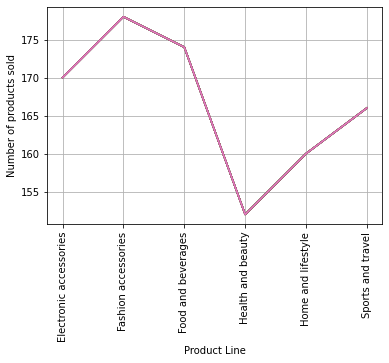

In [36]:
products = [i for i, df in sales_data.groupby('Product line')]

plt.plot(products, sales_data.groupby(['Product line']).count())
plt.xticks(products, rotation=90)
plt.xlabel('Product Line')
plt.ylabel('Number of products sold')
plt.grid()
plt.show()

#### Question 5: What total sales for each payment's method?

In [40]:
payment_sales = sales_data.groupby('Payment').sum()
payment_sales.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Payment,,,,,,,,,
Cash,19525.09,1896,5343.170,112206.570,106863.40,1638.095238,5343.170,2397.7,676
Credit card,16916.68,1722,4798.432,100767.072,95968.64,1480.952381,4798.432,2178.0,617
Ewallet,19230.36,1892,5237.767,109993.107,104755.34,1642.857143,5237.767,2397.0,700


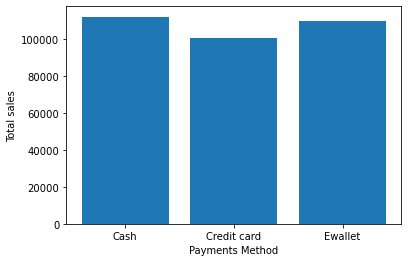

In [46]:
payments = [i for i, df in sales_data.groupby('Payment')]

plt.bar(payments, payment_sales['Total'])
plt.xticks(payments)
plt.xlabel('Payments Method')
plt.ylabel('Total sales')
plt.show()